# Homework 1
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

Due date: Wednesday, September 22 at midnight.

## Guidelines
* Answer in the cells immediately below the problem statements. If a problem calls for code, a code cell will follow. If a problem calls for a text response, a Markdown cell will follow.
* Your code should include some comments. Insufficient commentary may result in loss of points. But you do not necessarily need to comment every line or problem. Further guidelines:
    - If the the meaning of some line of code would be obvious to the average Python novice, you do not need to comment (e.g., you do not need to comment _import numpy_). 
    - If your code is moderately complex, you should comment (e.g., if you nest several functions in one line, you should comment). 
    - It may be proper to comment before a code block to describe generally what you are doing (e.g., you should comment before a function definition to explain the function and its parameters).

# Problem 1

## 1.1
Load the _lowbwt_ dataset from the OpenML repository as a Pandas DataFrame from following URL: https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff. Use a function that is able to handle loading the data directly into Jupyter from the URL. The function should take the URL as an argument. **Do not load the data using a filepath on your hard drive:** again, load the data directly into Jupyter using the URL.

Print the loaded DataFrame. Read the [description](https://www.openml.org/d/203) of the dataset to better understand it. Check the column names and values to see if they match the variables discussed in the description. One or more variables may have been renamed.

In [223]:
import pandas as pd
# a function called read_csv
def read_csv(link:str):
    return pd.read_csv(link)

df = read_csv('https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff')

In [224]:
df

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,class
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


In [6]:
df.columns

Index(['LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV',
       'class'],
      dtype='object')

## 1.2
From the full DataFrame, extract and print a DataFrame with the birthweight column (and only the birthweight column) for mothers who smoked during pregnancy and had low-birthweight deliveries.

In [147]:
# selecting rows that meet the conditions and then call it sub_df
sub_df = df[(df['SMOKE']==1)&(df['LOW']==1)]
# sub-select the "class" column from the sub_df dataframe and convert it to pandas dataframe
sub_df = pd.DataFrame(sub_df['class'])
sub_df

,class
130,709
132,1135
139,1790
140,1818
141,1885
144,1928
145,1928
147,1936
152,2084
153,2084


## 1.3
Print the following statistics for the birthweights in the original full dataset:
- Standard deviation
- 0.16 Quantile
- Mean
- Median
- 0.84 Quantile

Afterwards, print the same statistics for the birthweights in the subset you selected in 1.2.

In [156]:
print('standard deviation: %f' %(df['class'].describe()['std']))
print('0.16 quantile: %f' %df['class'].quantile(0.16))
print('mean: %f' %df['class'].describe()['mean'])
print('0.84 quantile: %f' %df['class'].quantile(0.84))


standard deviation: 729.022417
0.16 quantile: 2226.200000
mean: 2944.656085
0.84 quantile: 3695.160000


## 1.4
Plot two density histograms: one for the birthweights in the full dataset, and one for the birthweights in the subset you selected in 1.2. Label the histograms.

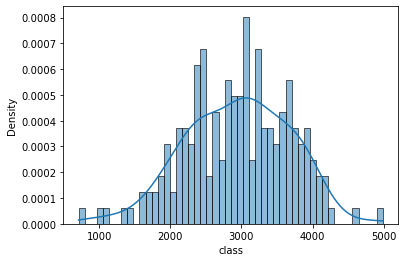

In [184]:
import seaborn as sns

sns.histplot(df['class'], kde=True, stat="density",bins=50)
plt.show()

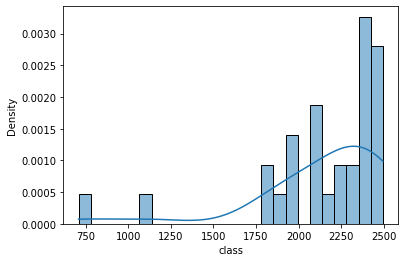

In [197]:
sns.histplot(sub_df['class'], kde=True, stat="density",bins=25)
plt.show()

## 1.5
Is a normal distribution a plausible model for birthweight in either of the two datasets? Back up your answer using the previous results. This image of a normal PDF may be useful:


![Normal PDF](bell-curve.jpg)

### _Answer:_

Only the first model can by explained by the normal distribution. Because it is a bell-shaped plot, which is very much like a normal distribution.

# Problem 2
In this exercise, we will proceed in steps to perform rejection sampling of a [beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) using a [triangular random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) as candidate.

## 2.1
Plot an overlay of a beta PDF and a triangular PDF with the following parameters:
- For the beta PDF, a=2, b=2, loc=0, scale=1.
- For the triangular PDF, c=0.50, loc=0, scale=1.

In [208]:
import matplotlib.pyplot as plt
from scipy.stats import beta, triang
import numpy as np
a = 2
b = 2
c = 0.5
x = np.arange(-0.5, 1.5,0.01)
y1 = beta.pdf(x,a,b, scale=1, loc=0)
y2 = triang.pdf(x,c, scale=1, loc=0)


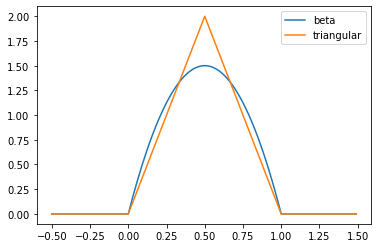

In [209]:
plt.plot(x,y1,label='beta')
plt.plot(x,y2,label='triangular')
plt.legend(loc="upper right")
plt.show()

## 2.2
We will perform 10,000 trials of the rejection sampling procedure. Simulate and store 10,000 random variables distributed as $\text{Uniform}[0,1]$ using random state 436. Simulate and store 10,000 triangular random variables from the specified triangular distribution using random state 636.

In [32]:
import random
import scipy.stats as stat
u = stat.uniform.rvs(size=10000, random_state=436)
tri = stat.triang.rvs(c = 0.5,size=10000, random_state=636)

<AxesSubplot:ylabel='Density'>

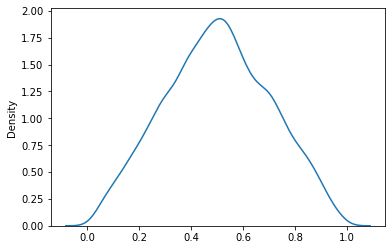

In [33]:
sns.kdeplot(tri)

## 2.3
Let $f$ be the beta PDF and $g$ the triangular PDF. Using 1.50 as an estimate of $\sup f/g$, generate samples from the beta distribution by rejection sampling. Store your samples. Print the number of samples you obtain.

In [47]:
# if values from g(x) >= c * f(X)/U, then accept, otherwise, reject
# candidate: triangular (denominator)
# beta(numerator)
# beta = (a,b)
# x is sampled from triangular distribition

samples = []
x = tri
for i in range(len(tri)):
    # candidate pdf
    cand = stat.triang.pdf(x[i],c=0.5)
    ratio = stat.beta.pdf(x[i],a=2, b=2) / cand
    if u[i] <= ratio/1.5:
        samples.append(x[i])

In [49]:
print(len(samples))

6674


## 2.4
Plot a density histogram of your samples overlaid with the beta and triangular PDFs. Use 100 bins.

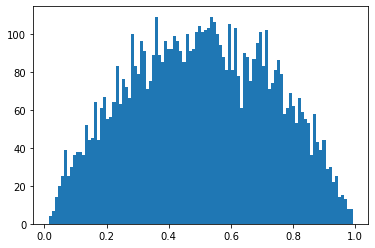

In [50]:
plt.hist(samples,bins=100)
plt.show()

# Problem 3

## 3.1
The Epanechnikov kernel is defined by
$$K(u) = \frac{3}{4}\left(1 - u^{2}\right)\qquad\text{for }\lvert u \rvert \leq 1$$
Perform Epanechnikov kernel density estimation on 1,000 simulated samples from a [lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) with s=1 and random state 636. Use a bandwidth of 2.0. Plot the density estimate over the support of the lognormal distribution. (You can use 2 times the maximum of your samples as an upper bound for the support.)

In [232]:
import scipy.stats as stat
import numpy as np
from functools import *
sample = stat.lognorm.rvs(s=1, loc=0, scale=1, size=1000, random_state=636)
bw = 2
x = np.linspace(np.min(sample),np.max(sample),1000)

In [236]:
#kernel function
def Epanechnikov_est(x):
    return (3/4)*(1-x**2)

def ekde(x, data, bw):
    density = []
    for i in range(len(data)):
        y = Epanechnikov_est((x-data[i])/bw)
        y[y<0] = 0
        density.append(y)
    return 1/(len(data)*2) * sum(density)

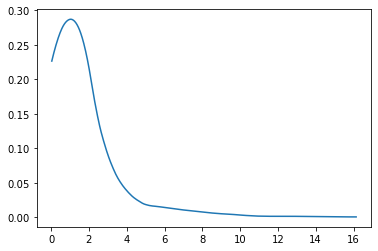

In [239]:
# plot
plt.plot(x, ekde(x,sample,2))

## 3.2
Test whether the estimate integrates to unity over the support of the lognormal distribution.

In [240]:
# integreation
np.trapz(ekde(x,sample,2), x)

0.8127974135971673

## 3.3
Explain the results of your integration.

### _Answer:_ It is not a perfect estimation as it only covers 81.27% of the area

# Problem 4

## 4.1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We also store the labels of the predictor variables for you.

Our goal will be to predict house price (MEDV) by regression. Split the dataset into a training and test set using 1/3 as the test size and a random state of 553. Use the function [_train_test_split_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from _sklearn.model_selection_ for this purpose.

In [157]:
# Loading data:

# Import function for loading the 'boston' dataset.
from sklearn.datasets import load_boston
# Load a 'bunch' containing data and descriptions.
boston_bunch = load_boston()
# Extract and store predictor variables.
X = boston_bunch.data
# Extract and store the variable that is the target for prediction.
y = boston_bunch.target
# Extract and store labels of predictor variables.
labels = boston_bunch.feature_names

In [158]:
# Your code:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=553)

## 4.2
Fit three different linear models on the training set by ordinary least squares (OLS): 
- A model using all predictor variables.
- A model using only AGE, NOX, DIS, and RAD as predictor variables.
- A model using all polynomial combinations of degree $\leq 2$ of the original thirteen predictor variables.

### model1

In [159]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

### model2

In [160]:
# find the index in the 2d array 
for counter, i in enumerate(labels):
    if i in ["AGE","NOX","DIS","RAD"]:
        print(counter)

4
6
7
8


In [161]:
X_model2_train = X_train[:,[4,6,7,8]]
X_model2_test = X_test[:,[4,6,7,8]]
regr2 = linear_model.LinearRegression()
regr2.fit(X_model2_train,y_train)

LinearRegression()

### model 3

In [162]:
def poly_combination(array:np.array):
    new_array = []
    for i in range(len(array)):
        for j in array[i:]:
            new_array.append(array[i]*j)
    new_array = np.concatenate((array, new_array), axis =0)
    return new_array
    

In [163]:
X_model3_train = np.array(list(map(poly_combination,list(X_train))))
X_model3_test = np.array(list(map(poly_combination,list(X_test))))

In [164]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_model3_train,y_train)

LinearRegression()

## 4.3
For model assessment, print the following for each of the three models:
- The $R^{2}$ of the predictions on the training set.
- The $R^{2}$ of the predictions on the test set.
- Predicted MEDV for the first five sample points in the test set.
- True MEDV for the first five sample points in the test set.

In [165]:
from sklearn.metrics import r2_score

### model 1

In [166]:
r2_score(y_train,regr.predict(X_train))

0.7666994695638145

In [167]:
r2_score(y_test,regr.predict(X_test))

0.6872592137146449

### model 2

In [168]:
r2_score(y_train, regr2.predict(X_model2_train))

0.2815080549659952

In [226]:
r2_score(y_test, regr2.predict(X_model2_test))

0.18523720715377578

### model 3

In [170]:
r2_score(y_train, regr3.predict(X_model3_train))

0.9430681924988941

In [171]:
r2_score(y_test, regr3.predict(X_model3_test))

0.8572666517666643

## 4.4
Comment on your results in 4.3, which model do you think is the best? Explain you answer.

### _Answer:_ Based on the results from 4.3, the third model is the best. However, since the discrepancy between the score of train set and test set, it seems that the model is overfitting. We need to have a residual plot to examine whether there is a systemmatic erroneous fitting pattern.

## 4.5
Consider the linear regression model using all original features you built above. Holding all other variables equal, what effect does the model predict that an increase in 0.1 parts per 10 million nitric oxide concentration in a place will have on the median value of of owner-occupied homes in that place? Write code that will return and print the answer.

### model1

In [172]:
import copy
X_train_modified = copy.copy(X_train)
X_train_modified[:,4] = X_train_modified[:,4] + 0.1
X_test_modified = copy.copy(X_test)
X_test_modified[:,4] = X_test_modified[:,4] + 0.1

In [225]:
np.median(regr.predict(X_train))-np.median(regr.predict(X_train_modified))

1.649636621618285

### We see a drop of 1.649 in median

## Code below is unnecessary!!!

### model2

In [174]:
X_model2_train_modified = copy.copy(X_model2_train)
X_model2_train_modified[:,0] = X_model2_train_modified[:,0] + 0.1

In [175]:
np.median(regr2.predict(X_model2_train))-np.median(regr2.predict(X_model2_train_modified))

2.923271543664004

### model3

In [176]:
X_model3_train_modified = np.array(list(map(poly_combination,list(X_train_modified))))

In [177]:
np.median(regr3.predict(X_model3_train))- np.median(regr3.predict(X_model3_train_modified))

1.1257835350379253